# NON-REGRESSED MATRICES

0.7504 0.9264


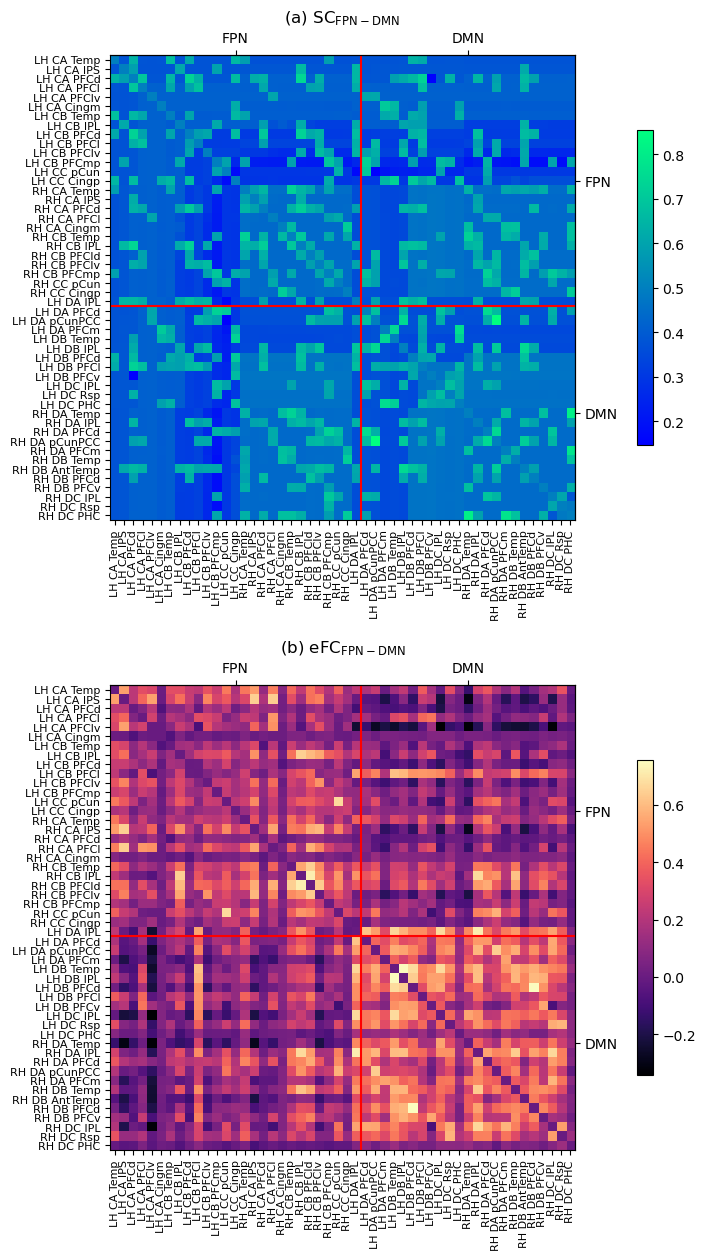

In [461]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Create lists for the corresponding names of the ROIs
fpn_labels = ['LH CA Temp', 'LH CA IPS', 'LH CA PFCd', 'LH CA PFCl', 'LH CA PFClv', 'LH CA Cingm', 'LH CB Temp', 'LH CB IPL', 'LH CB PFCd', 'LH CB PFCl', 'LH CB PFClv', 'LH CB PFCmp', 'LH CC pCun', 'LH CC Cingp', 'RH CA Temp', 'RH CA IPS', 'RH CA PFCd', 'RH CA PFCl', 'RH CA Cingm', 'RH CB Temp', 'RH CB IPL', 'RH CB PFCld', 'RH CB PFClv', 'RH CB PFCmp', 'RH CC pCun', 'RH CC Cingp']
dmn_labels = ['LH DA IPL', 'LH DA PFCd', 'LH DA pCunPCC', 'LH DA PFCm', 'LH DB Temp', 'LH DB IPL', 'LH DB PFCd', 'LH DB PFCl', 'LH DB PFCv', 'LH DC IPL', 'LH DC Rsp', 'LH DC PHC', 'RH DA Temp', 'RH DA IPL', 'RH DA PFCd', 'RH DA pCunPCC', 'RH DA PFCm', 'RH DB Temp', 'RH DB AntTemp', 'RH DB PFCd', 'RH DB PFCv', 'RH DC IPL', 'RH DC Rsp', 'RH DC PHC']
all_labels = fpn_labels + dmn_labels

mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')
mat2 = scipy.io.loadmat('/home/chanae/thesis/residual_matrices/residual_matrices.mat')
subj = 30

sc = np.zeros((50, 50))
efc = np.zeros((50, 50))
# pfc = np.zeros((50, 50))

# Get the upper triangle
sc[np.triu_indices(50)] = mat['in'][subj]
efc[np.triu_indices(50)] = mat['out'][subj]
# pfc[np.triu_indices(50)] = mat['predicted'][subj]

# Mirror upper triangle to lower triangle
sc += sc.T - np.diag(sc.diagonal())
efc += efc.T - np.diag(efc.diagonal())
# pfc += pfc.T - np.diag(pfc.diagonal())

sc_sparsity = np.sum((sc >= -0.5) & (sc <= 0.5)) / float(sc.size)
efc_sparsity = np.sum((efc >= -0.5) & (efc <= 0.5)) / float(efc.size)
print(sc_sparsity, efc_sparsity)


# Set up the figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 15))


# Create a list of titles and matrices for easy iteration
titles = ['(a) $SC_{FPN-DMN}$', '(b) $eFC_{FPN-DMN}$']
matrices = [sc, efc]
cmaps = ['winter', 'magma']

axs = axs.ravel()

for ax, title, mtx, cmap in zip(axs, titles, matrices, cmaps):
    # Plot the matrix
    im = ax.imshow(mtx, cmap=cmap)
   
    # Set title
    ax.set_title(title)

    # Set axis labels
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_xticks(range(len(all_labels)))
    ax.set_yticks(range(len(all_labels)))
    ax.set_xticklabels(all_labels, rotation=90)
    ax.set_yticklabels(all_labels)

    # Second X-axis
    ax2 = ax.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
    ax2.set_xticks([13, 38])
    ax2.set_xticklabels(['FPN', 'DMN'])
    # ax2.xaxis.set_tick_params(pad=85)

    # Second y-axis
    ax3 = ax.secondary_yaxis('right', functions=(lambda x: x, lambda x: x))
    ax3.set_yticks([13, 38])
    ax3.set_yticklabels(['FPN', 'DMN'])
    # ax3.yaxis.set_tick_params(pad=85)

    # Separate the regions
    ax.axhline(y=26.5, color='r', linestyle='-')
    ax.axvline(x=26.5, color='r', linestyle='-')

    fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6, pad=0.1)

# Add colorbar
# fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.3, pad=0.1)

plt.rcParams.update({'mathtext.default':'regular'})
plt.show()


# Mass SC


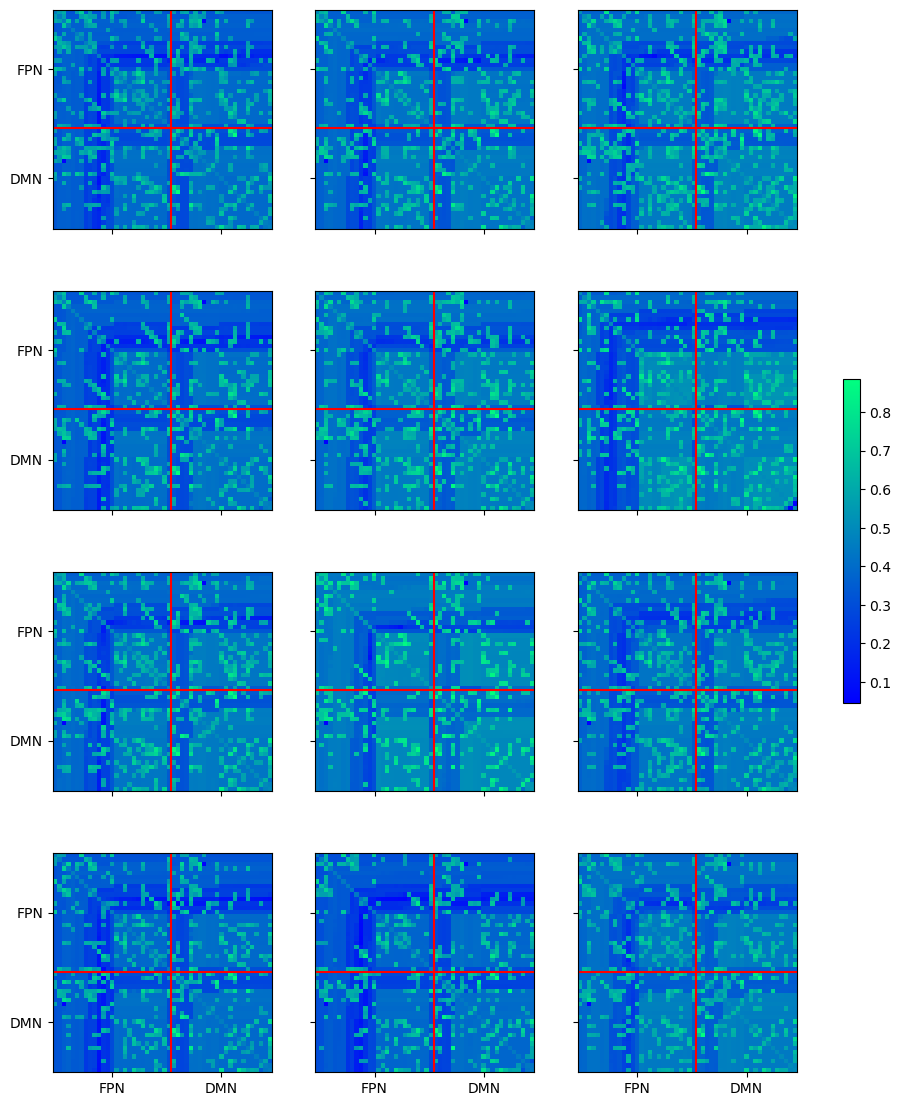

In [390]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random

mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')
subjs = random.sample(range(0, mat['in'].shape[0]), 12)

# Set up the figure and subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 14), sharex=True, sharey=True)
axs = axs.ravel()

for i, subj in enumerate(subjs):
    sc = np.zeros((50, 50))
    
    # Get the upper triangle for SC and eFC
    sc[np.triu_indices(50)] = mat['in'][subj]

    # Mirror the SC
    sc = sc + sc.T - np.diag(sc.diagonal())

    im = axs[i].imshow(sc, cmap='winter')
    # Separate the regions
    axs[i].axhline(y=26.5, color='r', linestyle='-')
    axs[i].axvline(x=26.5, color='r', linestyle='-')

    # Group the FPN and DMN
    axs[i].set_xticks([13, 38]) #Midpoints of the groups
    axs[i].set_yticks([13, 38])
    axs[i].set_xticklabels(['FPN', 'DMN'])
    axs[i].set_yticklabels(['FPN', 'DMN'])

fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.3)
plt.show()


# Mass SC and eFC

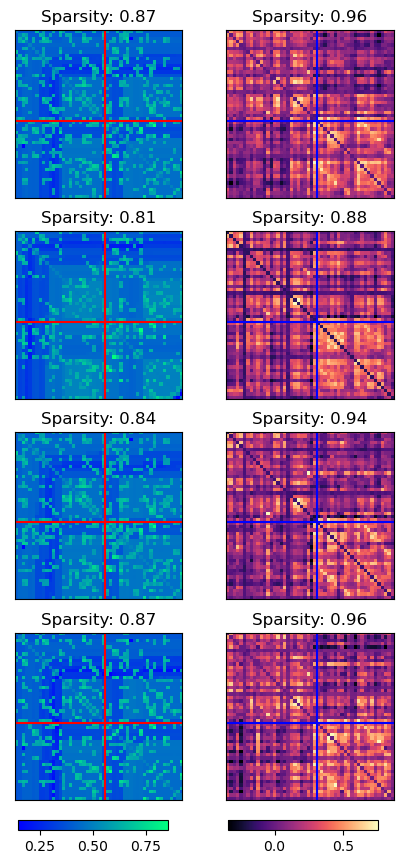

In [467]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import count_nonzero

mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')
subjs = random.sample(range(0, mat['in'].shape[0]), 4)

# Set up the figure and subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(5, 10))

# Colorbar axes
cax1 = fig.add_axes([0.14, 0.08, 0.3, 0.01])
cax2 = fig.add_axes([0.56, 0.08, 0.3, 0.01])

for i, subj in enumerate(subjs):
    sc = np.zeros((50, 50))
    efc = np.zeros((50, 50))
   
    # Get the upper triangle for SC, then mirror it to get lower triangle
    sc[np.triu_indices(50)] = mat['in'][subj]    
    # sc_sparsity = 1 - count_nonzero(sc) / float(sc.size)
    sc_sparsity = np.sum((sc >= -0.5) & (sc <= 0.5)) / float(sc.size)
    sc = sc + sc.T - np.diag(sc.diagonal())    

    # Get the upper triangle for eFC, then mirror it to get lower triangle
    efc[np.triu_indices(50)] = mat['out'][subj]    
    # efc_sparsity = 1 - count_nonzero(efc) / float(efc.size)
    # efc_sparsity = np.sum(efc < ((np.max(efc) - np.min(efc))/2)) / float(efc.size)
    efc_sparsity = np.sum((efc >= -0.5) & (efc <= 0.5)) / float(efc.size)
    efc = efc + efc.T - np.diag(efc.diagonal())    

    # SC
    im0 = axs[i][0].imshow(sc, cmap='winter')
    # Separate the regions
    axs[i][0].axhline(y=26.5, color='r', linestyle='-')
    axs[i][0].axvline(x=26.5, color='r', linestyle='-')

    # Turn off tick labels
    axs[i][0].set_xticks([])
    axs[i][0].set_yticks([])
    axs[i][0].set_xticklabels([])
    axs[i][0].set_yticklabels([])

    # Title with sparsity
    axs[i][0].set_title(f'Sparsity: {sc_sparsity:.2f}')

    # FC
    im1 = axs[i][1].imshow(efc, cmap='magma')
    # Separate the regions
    axs[i][1].axhline(y=26.5, color='b', linestyle='-')
    axs[i][1].axvline(x=26.5, color='b', linestyle='-')    

    # Turn off tick labels
    axs[i][1].set_xticks([])
    axs[i][1].set_yticks([])
    axs[i][1].set_xticklabels([])
    axs[i][1].set_yticklabels([])

    # Title with sparsity
    axs[i][1].set_title(f'Sparsity: {efc_sparsity:.2f}')

fig.colorbar(im0, cax=cax1, orientation='horizontal')
fig.colorbar(im1, cax=cax2, orientation='horizontal')


# cols = ['(a) $SC_{FPN-DMN}$', '(b) $eFC_{FPN-DMN}$']
# for ax, col in zip(axs[0], cols):
#     ax.set_title(col)

# plt.tight_layout()
plt.show()

In [434]:
mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')
subjs = [93, 46, 12, 141, 121, 91, 187, 209, 92, 162, 95, 62]

max_vals = []
min_vals = []


for subj in subjs:
    sc = np.zeros((50, 50))
    efc = np.zeros((50, 50))
    
    # Get the triangles
    sc[np.triu_indices(50)] = mat['in'][subj]
    efc[np.triu_indices(50)] = mat['out'][subj]

    max_vals.append(sc.max())
    min_vals.append(sc.min())
    max_vals.append(efc.max())
    min_vals.append(efc.min())

print(max_vals)
print(min_vals)




[0.8316066695569962, 0.8783672770715013, 0.8161441180996719, 0.8576785688990337, 0.8365179616243182, 0.8438062825802061, 0.8582567868501765, 0.8581222366404258, 0.8495434471184895, 0.792931592598461, 0.8639955737301274, 0.8233991353893064, 0.8021080421160185, 0.8990553699159249, 0.848892415141864, 0.814651500943015, 0.8533158452855208, 0.9076869438255074, 0.8207768288584055, 0.8560943134566524, 0.8125126846398975, 0.8407716970950018, 0.8460369554104037, 0.8712662266504434]
[0.0, -0.184077755630837, 0.0, -0.15238997479609567, 0.0, -0.22167714441435568, 0.0, -0.3044201541260152, 0.0, -0.12059364505822161, 0.0, -0.32761750098608877, 0.0, -0.2100575395607229, 0.0, -0.2926708044734628, 0.0, -0.13526261330441644, 0.0, -0.34774803504460283, 0.0, -0.32290741669284584, 0.0, -0.3003866788919471]


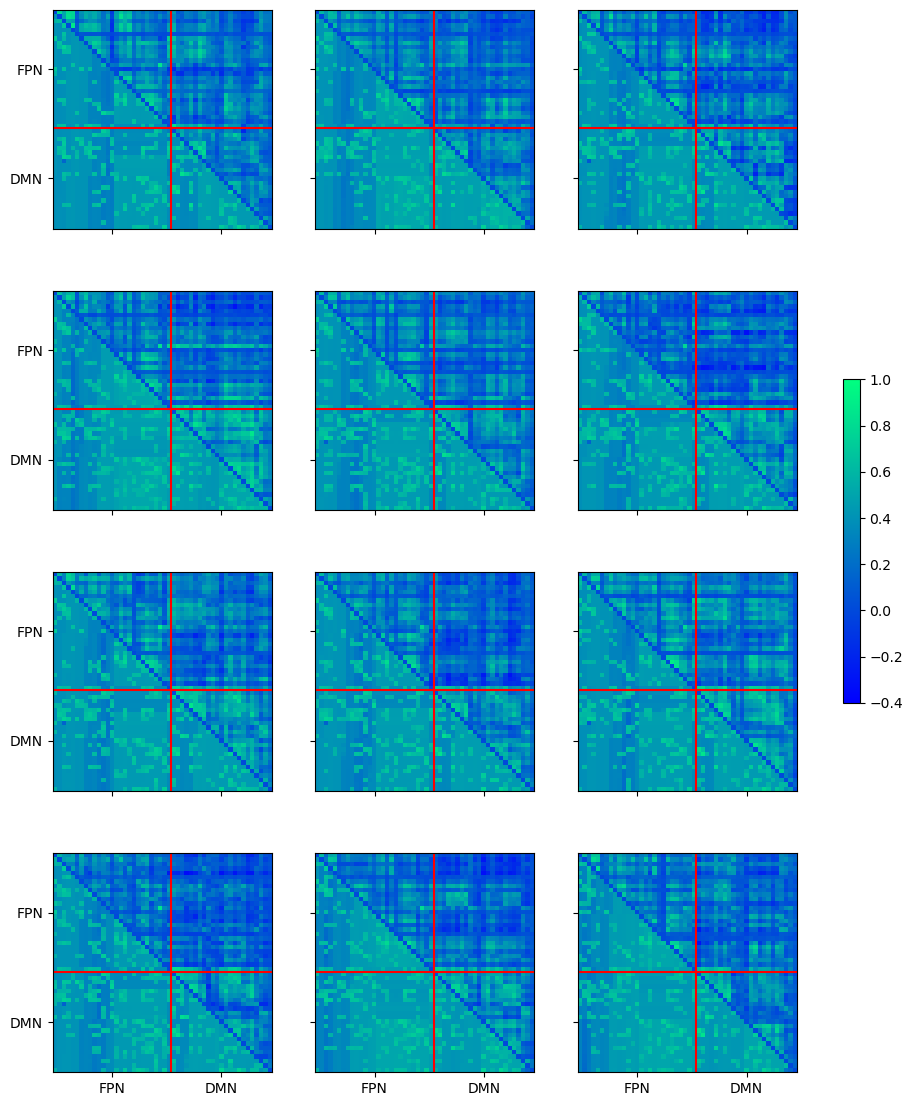

In [435]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random

mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')
# subjs = random.sample(range(0, mat['in'].shape[0]), 12)
subjs = [93, 46, 12, 141, 121, 91, 187, 209, 92, 162, 95, 62]

# Set up the figure and subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 14), sharex=True, sharey=True)
axs = axs.ravel()

for i, subj in enumerate(subjs):
    sc = np.zeros((50, 50))
    efc = np.zeros((50, 50))
    
    # Get the triangles
    sc[np.triu_indices(50)] = mat['in'][subj]
    efc[np.triu_indices(50)] = mat['out'][subj]

    # Put SC in lower triangle and eFC in upper triangle
    sc_efc = efc + sc.T - np.diag(sc.diagonal())
    

    im = axs[i].imshow(sc_efc, cmap='winter', vmin=-0.4, vmax=1)
    # Separate the regions
    axs[i].axhline(y=26.5, color='r', linestyle='-')
    axs[i].axvline(x=26.5, color='r', linestyle='-')

    # Group the FPN and DMN
    axs[i].set_xticks([13, 38]) #Midpoints of the groups
    axs[i].set_yticks([13, 38])
    axs[i].set_xticklabels(['FPN', 'DMN'])
    axs[i].set_yticklabels(['FPN', 'DMN'])

fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.3)
plt.show()


In [493]:
def pearson_corr(efc, pfc):
    # Flatten the matrices
    efc_flat = efc.flatten()
    pfc_flat = pfc.flatten()

    # Calculate Pearson correlation between each pair of true and predicted outputs
    correlation, _ = scipy.stats.pearsonr(efc_flat, pfc_flat)

    return correlation, efc_flat, pfc_flat

mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')

for subj in range(0, mat['in'].shape[0]):
    corr, efc_flat, pfc_flat = pearson_corr(mat['out'][subj], mat['predicted'][subj])
    print(f'{subj}: {corr}')

0: 0.7123720483482345
1: 0.5941134755170097
2: 0.5803068793724148
3: 0.7017734226031179
4: 0.7032484467654351
5: 0.7209931202549659
6: 0.6571398247228544
7: 0.5575447963361152
8: 0.7357571557667971
9: 0.7360833088815365
10: 0.6461411682355209
11: 0.7526355293605568
12: 0.7688551578831161
13: 0.7559290145940222
14: 0.6928061741360121
15: 0.6003508087581748
16: 0.5380195966716638
17: 0.6250409103674537
18: 0.649902276339782
19: 0.6936976828495716
20: 0.546595439010852
21: 0.7343584202571496
22: 0.8005704471853657
23: 0.709261180152347
24: 0.7303790288974393
25: 0.7053151015936028
26: 0.6537008564950252
27: 0.6500804143909245
28: 0.7861777499183673
29: 0.6657728154993631
30: 0.674455267526525
31: 0.4838349412744774
32: 0.649502737057262
33: 0.5098529458491337
34: 0.7118021701196067
35: 0.6247189523987591
36: 0.5432914509716129
37: 0.6851887879927365
38: 0.7291258780711091
39: 0.787999222618927
40: 0.6106171676751936
41: 0.6905821351729887
42: 0.6890291989335287
43: 0.6356565355368035
44: 

# PFC

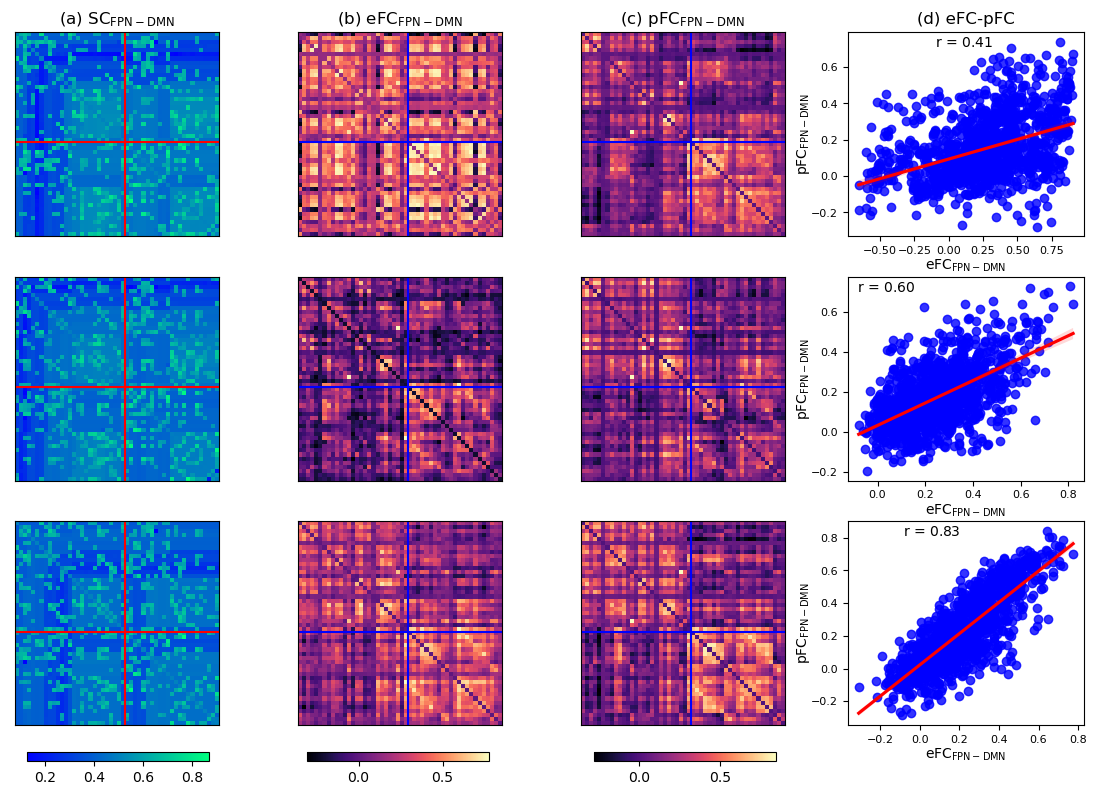

In [501]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

def pearson_corr(efc, pfc):
    # Flatten the matrices
    efc_flat = efc.flatten()
    pfc_flat = pfc.flatten()

    # Calculate Pearson correlation between each pair of true and predicted outputs
    correlation, _ = scipy.stats.pearsonr(efc_flat, pfc_flat)

    return correlation, efc_flat, pfc_flat

mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')
# subjs = random.sample(range(0, mat['in'].shape[0]), 3)
subjs = [84, 130, 63]

# Set up the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14, 9))

for i, subj in enumerate(subjs):
    sc = np.zeros((50, 50))
    efc = np.zeros((50, 50))
    pfc = np.zeros((50, 50))
    correlation, efc_flat, pfc_flat = pearson_corr(mat['out'][subj], mat['predicted'][subj])

   
    # Construct SC
    sc[np.triu_indices(50)] = mat['in'][subj]
    sc += sc.T - np.diag(sc.diagonal())

    # Construct eFC
    efc[np.triu_indices(50)] = mat['out'][subj]
    efc += efc.T - np.diag(efc.diagonal())

    # Construct pFC
    pfc[np.triu_indices(50)] = mat['predicted'][subj]
    pfc += pfc.T - np.diag(pfc.diagonal())


    # Plot SC
    im0 = axs[i][0].imshow(sc, cmap='winter')
    # Separate the regions
    axs[i][0].axhline(y=26.5, color='r', linestyle='-')
    axs[i][0].axvline(x=26.5, color='r', linestyle='-')
    # Turn off tick labels
    axs[i][0].set_xticks([])
    axs[i][0].set_yticks([])
    axs[i][0].set_xticklabels([])
    axs[i][0].set_yticklabels([])

    # Plot eFC
    im1 = axs[i][1].imshow(efc, cmap='magma')
    # Separate the regions
    axs[i][1].axhline(y=26.5, color='b', linestyle='-')
    axs[i][1].axvline(x=26.5, color='b', linestyle='-')    
    # Turn off tick labels
    axs[i][1].set_xticks([])
    axs[i][1].set_yticks([])
    axs[i][1].set_xticklabels([])
    axs[i][1].set_yticklabels([])

    # Plot pFC
    im2 = axs[i][2].imshow(pfc, cmap='magma')
    # Separate the regions
    axs[i][2].axhline(y=26.5, color='b', linestyle='-')
    axs[i][2].axvline(x=26.5, color='b', linestyle='-')    
    # Turn off tick labels
    axs[i][2].set_xticks([])
    axs[i][2].set_yticks([])
    axs[i][2].set_xticklabels([])
    axs[i][2].set_yticklabels([])

    # Scatter
    sns.regplot(x=efc_flat, y=pfc_flat, color='b', line_kws={'color': 'red'}, ax=axs[i][3])
    axs[i][3].set_xlabel('$eFC_{FPN-DMN}$', labelpad=1.3)    
    axs[i][3].set_ylabel('$pFC_{FPN-DMN}$', labelpad=-0.5)
    xlim = axs[i][3].get_xlim()
    ylim = axs[i][3].get_ylim()
    axs[i][3].text(xlim[1]*-0.1, ylim[1]*0.9, f'$r$ = {correlation:.2f}')
    axs[i][3].tick_params(axis='both', which='major', labelsize=8)

# Colorbar axes
cax1 = fig.add_axes([0.145, 0.07, 0.13, 0.01])
cax2 = fig.add_axes([0.345, 0.07, 0.13, 0.01])
cax3 = fig.add_axes([0.55, 0.07, 0.13, 0.01])

# Add colobars
fig.colorbar(im0, cax=cax1, orientation='horizontal')
fig.colorbar(im1, cax=cax2, orientation='horizontal')
fig.colorbar(im2, cax=cax3, orientation='horizontal')


cols = ['(a) $SC_{FPN-DMN}$', '(b) $eFC_{FPN-DMN}$', '(c) $pFC_{FPN-DMN}$', '(d) eFC-pFC']
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

# plt.tight_layout()
plt.show()

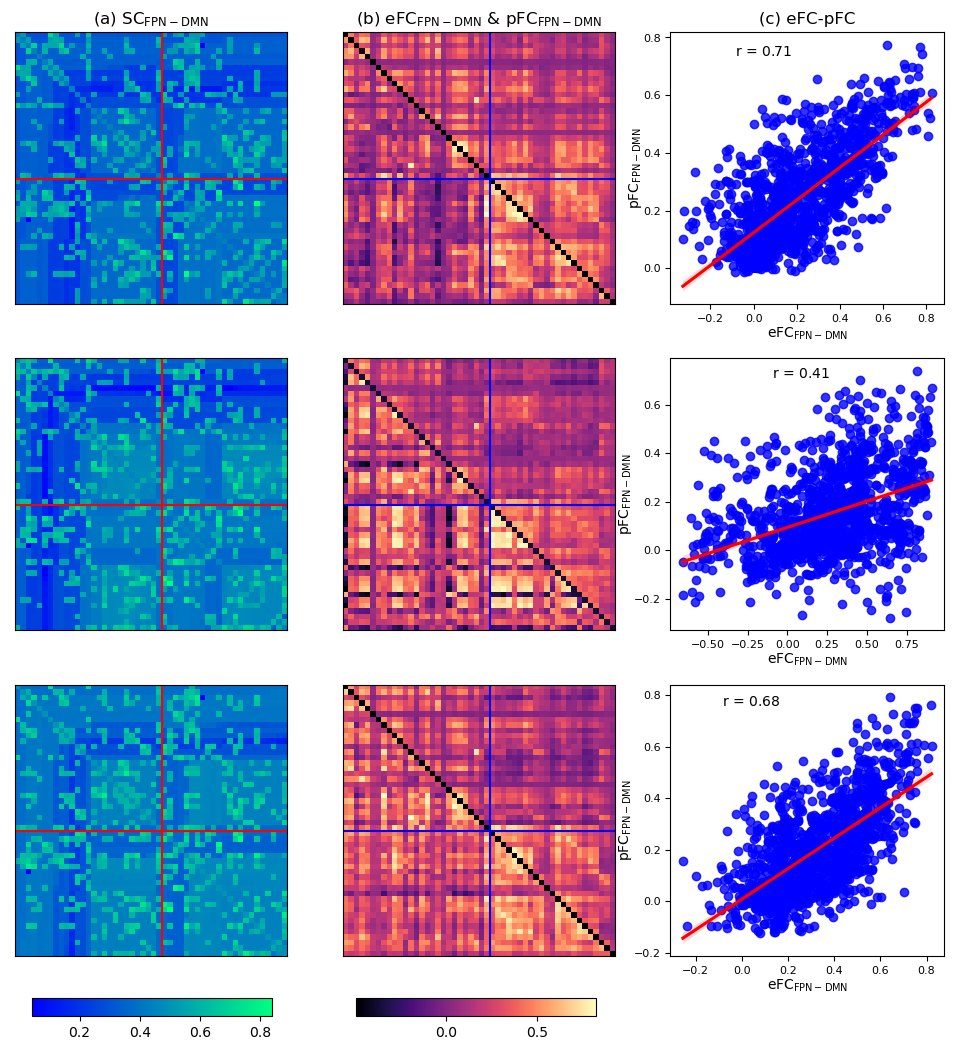

In [386]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

def pearson_corr(efc, pfc):
    # Flatten the matrices
    efc_flat = efc.flatten()
    pfc_flat = pfc.flatten()

    # Calculate Pearson correlation between each pair of true and predicted outputs
    correlation, _ = scipy.stats.pearsonr(efc_flat, pfc_flat)

    return correlation, efc_flat, pfc_flat

mat = scipy.io.loadmat('/home/chanae/thesis/nn_predicted_fc/predicted_fc.mat')
subjs = random.sample(range(0, mat['in'].shape[0]), 3)

# Set up the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Colorbar axes
cax1 = fig.add_axes([0.14, 0.06, 0.2, 0.015])
cax2 = fig.add_axes([0.41, 0.06, 0.2, 0.015])

for i, subj in enumerate(subjs):
    sc = np.zeros((50, 50))
    efc = np.zeros((50, 50))
    pfc = np.zeros((50, 50))
    correlation, efc_flat, pfc_flat = pearson_corr(mat['out'][subj], mat['predicted'][subj])

   
    # Get the upper triangle for SC, eFC and pFC
    sc[np.triu_indices(50)] = mat['in'][subj]
    efc[np.triu_indices(50)] = mat['out'][subj]
    pfc[np.triu_indices(50)] = mat['predicted'][subj]

    # Mirror upper SC triangle to lower triangle
    sc += sc.T - np.diag(sc.diagonal())

    # Create efc_pfc composite with efc in lower triangle and pfc in upper triangle
    efc_pfc = pfc + efc.T - np.diag(sc.diagonal())

    # SC
    im0 = axs[i][0].imshow(sc, cmap='winter')
    # Separate the regions
    axs[i][0].axhline(y=26.5, color='r', linestyle='-')
    axs[i][0].axvline(x=26.5, color='r', linestyle='-')


    # Turn off tick labels
    axs[i][0].set_xticks([])
    axs[i][0].set_yticks([])
    axs[i][0].set_xticklabels([])
    axs[i][0].set_yticklabels([])

    # FC
    im1 = axs[i][1].imshow(efc_pfc, cmap='magma')
    # Separate the regions
    axs[i][1].axhline(y=26.5, color='b', linestyle='-')
    axs[i][1].axvline(x=26.5, color='b', linestyle='-')    

    # Turn off tick labels
    axs[i][1].set_xticks([])
    axs[i][1].set_yticks([])
    axs[i][1].set_xticklabels([])
    axs[i][1].set_yticklabels([])

    # Scatter
    sns.regplot(x=efc_flat, y=pfc_flat, color='b', line_kws={'color': 'red'}, ax=axs[i][2])
    axs[i][2].set_xlabel('$eFC_{FPN-DMN}$', labelpad=1.3)    
    axs[i][2].set_ylabel('$pFC_{FPN-DMN}$', labelpad=-0.5)
    xlim = axs[i][2].get_xlim()
    ylim = axs[i][2].get_ylim()
    axs[i][2].text(xlim[1]*-0.1, ylim[1]*0.9, f'$r$ = {correlation:.2f}')
    axs[i][2].tick_params(axis='both', which='major', labelsize=8)

fig.colorbar(im0, cax=cax1, orientation='horizontal')
fig.colorbar(im1, cax=cax2, orientation='horizontal')


cols = ['(a) $SC_{FPN-DMN}$', '(b) $eFC_{FPN-DMN}$ & $pFC_{FPN-DMN}$', '(c) eFC-pFC']
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

# plt.tight_layout()
plt.show()

# RESIDUALS

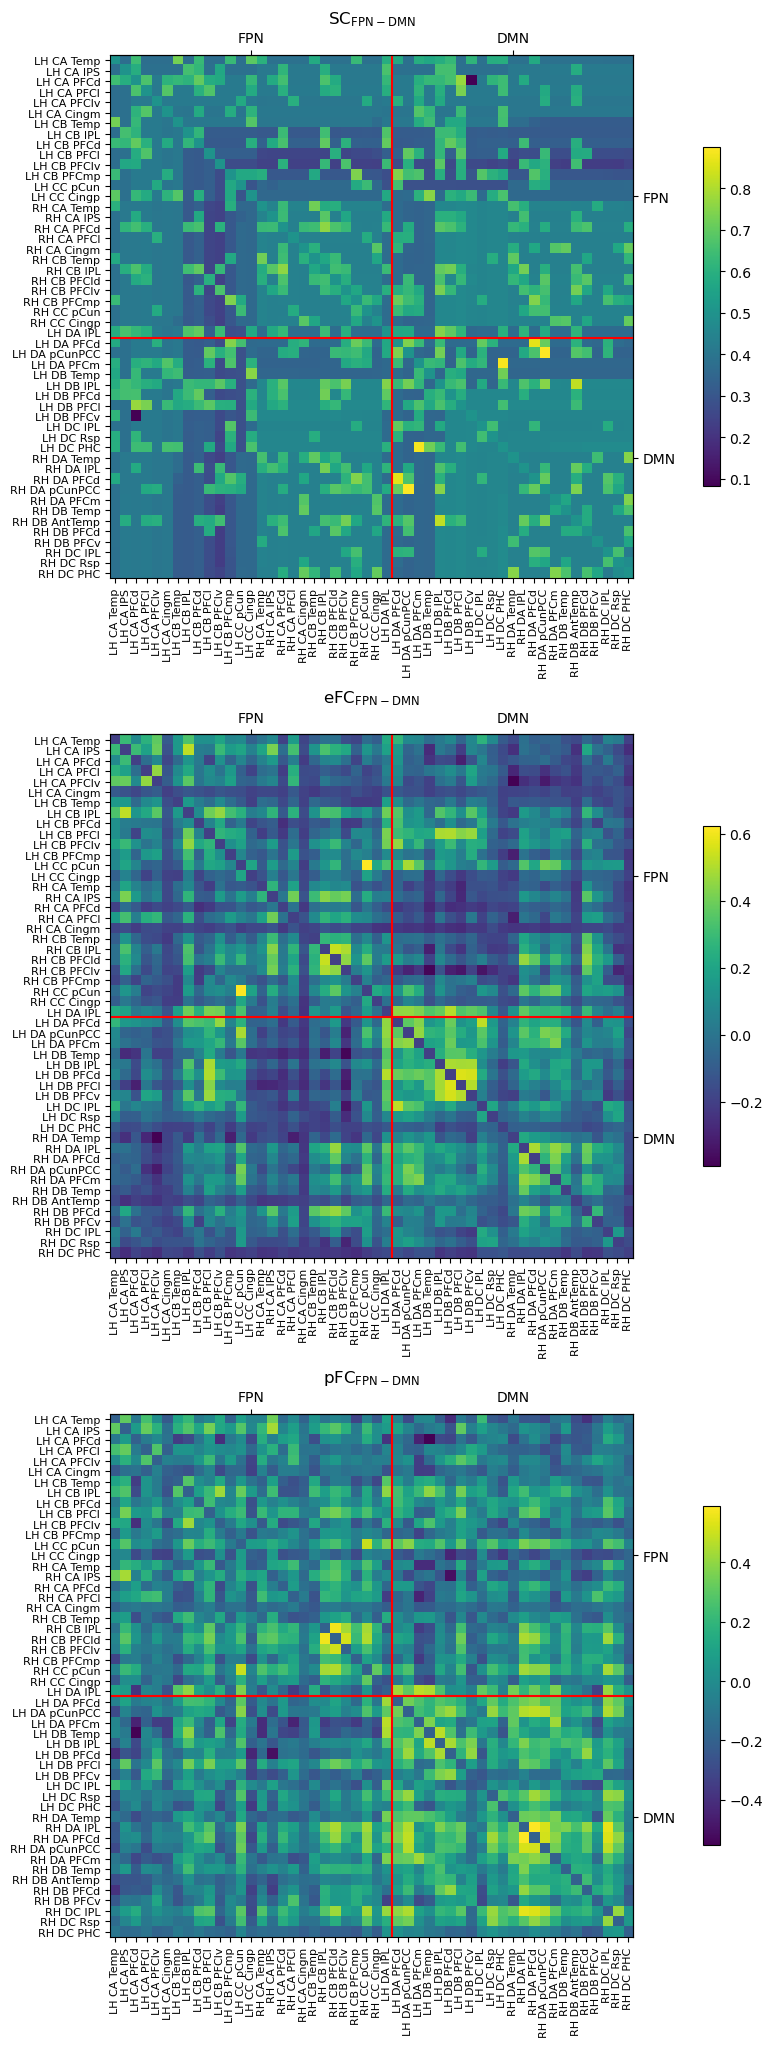

In [164]:
sc = np.zeros((50, 50))
efc = np.zeros((50, 50))
pfc = np.zeros((50, 50))

# Get the upper triangle
sc[np.triu_indices(50)] = mat2['in'][subj]
efc[np.triu_indices(50)] = mat2['out'][subj]
pfc[np.triu_indices(50)] = mat2['predicted'][subj]

# Mirror upper triangle to lower triangle
sc += sc.T - np.diag(sc.diagonal())
efc += efc.T - np.diag(efc.diagonal())
pfc += pfc.T - np.diag(pfc.diagonal())

# Set up the figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 25))


# Create a list of titles and matrices for easy iteration
titles = ['$SC_{FPN-DMN}$', '$eFC_{FPN-DMN}$', '$pFC_{FPN-DMN}$']
matrices = [sc, efc, pfc]

axs = axs.ravel()

for ax, title, mtx in zip(axs, titles, matrices):
    # Plot the matrix
    im = ax.imshow(mtx, cmap='viridis')
   
    # Set title
    ax.set_title(title)

    # Set axis labels
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_xticks(range(len(all_labels)))
    ax.set_yticks(range(len(all_labels)))
    ax.set_xticklabels(all_labels, rotation=90)
    ax.set_yticklabels(all_labels)

    # Second X-axis
    ax2 = ax.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
    ax2.set_xticks([13, 38])
    ax2.set_xticklabels(['FPN', 'DMN'])
    # ax2.xaxis.set_tick_params(pad=85)

    # Second y-axis
    ax3 = ax.secondary_yaxis('right', functions=(lambda x: x, lambda x: x))
    ax3.set_yticks([13, 38])
    ax3.set_yticklabels(['FPN', 'DMN'])
    # ax3.yaxis.set_tick_params(pad=85)

    # Separate the regions
    ax.axhline(y=26.5, color='r', linestyle='-')
    ax.axvline(x=26.5, color='r', linestyle='-')

    fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6, pad=0.1)

# Add colorbar
# fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.3, pad=0.1)

plt.rcParams.update({'mathtext.default':'regular'})
plt.show()


